In [1]:
'''
Import Packages
'''
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
import cv2
import os
import h5py

In [2]:
'''
Parameters
'''
images_per_class       = 10
fixed_size             = tuple((500, 500))
train_path             = "C:\\Users\\ganesh appu\\Downloads\\project_imageprocessing\\Plant_leave_diseases_dataset_with_augmentation\\"
h5_train_data          = 'C:\\Users\\ganesh appu\\Downloads\\project_imageprocessing\\train_data.h5'
h5_train_labels        = 'C:\\Users\\ganesh appu\\Downloads\\project_imageprocessing\\train_labels.h5'
bins                   = 8

In [3]:
'''
function for convertion of Image format from BGR TO RGB
'''
def rgb_bgr(image):
    rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return rgb_img

In [4]:
'''
Converting the Image from RGB to HSV color space
'''
def bgr_hsv(rgb_img):
    hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
    return hsv_img

In [5]:
'''
Image Segmentation
'''
def img_segmentation(rgb_img,hsv_img):
    lower_green = np.array([25,0,20])
    upper_green = np.array([100,255,255])
    healthy_mask = cv2.inRange(hsv_img, lower_green, upper_green)
    result = cv2.bitwise_and(rgb_img,rgb_img, mask=healthy_mask)
    lower_brown = np.array([10,0,10])
    upper_brown = np.array([30,255,255])
    disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
    disease_result = cv2.bitwise_and(rgb_img, rgb_img, mask=disease_mask)
    final_mask = healthy_mask + disease_mask
    final_result = cv2.bitwise_and(rgb_img, rgb_img, mask=final_mask)
    return final_result

In [6]:
'''
Global Feature: 1 Shape
Hu moments
'''
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [7]:
'''
Global Feature: 2 Texture
Haralick Texture
'''
def fd_haralick(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    return haralick

In [8]:
'''
Global Feature: 3 Color
'''
def fd_histogram(image, mask=None):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [9]:
train_labels = os.listdir(train_path)
train_labels.sort()
print(train_labels)
global_features = []
labels          = []

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl

In [10]:
pwd

'C:\\Users\\ganesh appu\\Downloads\\project_imageprocessing'

In [11]:
for training_name in train_labels:
    dir = os.path.join(train_path, training_name)

    current_label = training_name
    #Images in each file
    for x in range(1,images_per_class+1):
        file = dir + "\\" + "image (" +str(x) + ")" +".jpg"

        # Reading the image and converting it to required size
        image = cv2.imread(file)
        image = cv2.resize(image, fixed_size)

        
        # Calling Functions
        
        RGB_BGR       = rgb_bgr(image)
        BGR_HSV       = bgr_hsv(RGB_BGR)
        IMG_SEGMENT   = img_segmentation(RGB_BGR,BGR_HSV)

        # Extracting Features
        
        fv_hu_moments = fd_hu_moments(IMG_SEGMENT)
        fv_haralick   = fd_haralick(IMG_SEGMENT)
        fv_histogram  = fd_histogram(IMG_SEGMENT)
        
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
        
        #Storing the features
        labels.append(current_label)
        global_features.append(global_feature)

    print("processed folder: {}".format(current_label))

print("completed Global Feature Extraction...")


processed folder: Apple___Apple_scab
processed folder: Apple___Black_rot
processed folder: Apple___Cedar_apple_rust
processed folder: Apple___healthy
processed folder: Background_without_leaves
processed folder: Blueberry___healthy
processed folder: Cherry___Powdery_mildew
processed folder: Cherry___healthy
processed folder: Corn___Cercospora_leaf_spot Gray_leaf_spot
processed folder: Corn___Common_rust
processed folder: Corn___Northern_Leaf_Blight
processed folder: Corn___healthy
processed folder: Grape___Black_rot
processed folder: Grape___Esca_(Black_Measles)
processed folder: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
processed folder: Grape___healthy
processed folder: Orange___Haunglongbing_(Citrus_greening)
processed folder: Peach___Bacterial_spot
processed folder: Peach___healthy
processed folder: Pepper,_bell___Bacterial_spot
processed folder: Pepper,_bell___healthy
processed folder: Potato___Early_blight
processed folder: Potato___Late_blight
processed folder: Potato___healthy

In [12]:
'''
Overall vector size used for training the model is
'''
print("No of Features are {}".format(np.array(global_features).shape))

No of Features are (390, 532)


In [13]:
'''
Overall Training Label size
'''
print("Training Labels {}".format(np.array(labels).shape))

Training Labels (390,)


In [14]:
# Encoding the Training Labels to Decrease the size
targetNames = np.unique(labels)
le          = LabelEncoder()
target      = le.fit_transform(labels)
print("Training labels encoded")

Training labels encoded


In [15]:
#Normalizing the feature vectors for size reduction
from sklearn.preprocessing import MinMaxScaler
scaler            = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print("Feature vector normalized")

Feature vector normalized


In [16]:
print("Target labels: {}".format(target))
print("Target labels shape: {}".format(target.shape))

Target labels: [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32

In [17]:
#To save the feature vector on the local system
h5f_data = h5py.File(h5_train_data, 'w')
h5f_data.create_dataset('dataset#1', data=np.array(rescaled_features))

<HDF5 dataset "dataset#1": shape (390, 532), type "<f8">

In [18]:
#To save target labels
h5f_label = h5py.File(h5_train_labels, 'w')
h5f_label.create_dataset('dataset#1', data=np.array(target))

<HDF5 dataset "dataset#1": shape (390,), type "<i8">

In [19]:
h5f_data.close()
h5f_label.close()

In [20]:
import h5py
import numpy as np
import os
import glob
import cv2
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib

warnings.filterwarnings('ignore')


C:\Users\ganesh appu\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [21]:
#!pip install joblib

In [22]:
# tunable-parameters
num_trees = 100
test_size = 0.20
seed      = 9
train_path = "C:\\Users\\ganesh appu\\Downloads\\project_imageprocessing\\Plant_leave_diseases_dataset_with_augmentation\\"
h5_train_data    = 'C:\\Users\\ganesh appu\\Downloads\\project_imageprocessing\\train_data.h5'
h5_train_labels  = 'C:\\Users\\ganesh appu\\Downloads\\project_imageprocessing\\train_labels.h5'
scoring    = "accuracy"

In [23]:
# get the training labels
train_labels = os.listdir(train_path)

# sort the training labels
train_labels.sort()

In [24]:
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=seed)))

In [25]:
results = []
names   = []

h5f_data  = h5py.File(h5_train_data, 'r')
h5f_label = h5py.File(h5_train_labels, 'r')


global_features_string = h5f_data['dataset#1']
global_labels_string   = h5f_label['dataset#1']

global_features = np.array(global_features_string)
global_labels   = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

# verify the shape of the feature vector and labels
print("[STATUS] features shape: {}".format(global_features.shape))
print("[STATUS] labels shape: {}".format(global_labels.shape))

print("[STATUS] training started...")

[STATUS] features shape: (390, 532)
[STATUS] labels shape: (390,)
[STATUS] training started...


In [26]:
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))

[STATUS] splitted train and test data...
Train data  : (312, 532)
Test data   : (78, 532)


In [27]:
trainDataGlobal

array([[9.45611734e-01, 0.00000000e+00, 0.00000000e+00, ...,
        9.75225694e-01, 8.80787807e-02, 5.24793828e-01],
       [9.86357503e-01, 3.60436573e-02, 4.91621560e-04, ...,
        9.75225376e-01, 8.80702946e-02, 5.24794375e-01],
       [9.94721836e-01, 1.85143470e-03, 1.23738979e-04, ...,
        9.75224418e-01, 8.73303449e-02, 5.24782975e-01],
       ...,
       [9.43665634e-01, 0.00000000e+00, 0.00000000e+00, ...,
        9.75174616e-01, 9.00897562e-02, 5.24953176e-01],
       [9.95389681e-01, 0.00000000e+00, 0.00000000e+00, ...,
        9.75243392e-01, 9.26997184e-02, 5.24845759e-01],
       [9.76347475e-01, 0.00000000e+00, 0.00000000e+00, ...,
        9.75220452e-01, 8.82675311e-02, 5.24755592e-01]])

In [36]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.330444 (0.103874)
LDA: 0.166734 (0.053750)
KNN: 0.288710 (0.056436)
CART: 0.288105 (0.082209)
RF: 0.480847 (0.062254)
NB: 0.246673 (0.065582)
SVM: 0.112399 (0.050791)


In [28]:
clf  = RandomForestClassifier(n_estimators=num_trees, random_state=seed)

In [29]:
clf.fit(trainDataGlobal, trainLabelsGlobal)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

In [30]:
y_predict=clf.predict(testDataGlobal)

In [31]:
y_predict

array([28, 10, 15, 28, 29, 20, 36, 36, 14,  5, 38,  1, 27, 29,  1,  6, 31,
       17,  1, 18, 28, 34, 28,  1, 14,  8, 14, 13, 15, 27, 12,  2, 35,  9,
       24,  2, 38,  3, 24, 15, 11, 11, 29, 23,  9, 13, 29, 13, 27, 15, 37,
        1, 25, 38, 23,  3, 14, 10, 35, 23,  7,  7, 29, 29,  2, 15, 13, 32,
       27, 21, 29, 15,  4,  9, 24, 12,  3,  5], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(testLabelsGlobal, y_predict)

0.5512820512820513

In [55]:
clf.predict(testDataGlobal[0].reshape(1,-1))

array([28], dtype=int64)

In [40]:
#testDataGlobal[0]

In [41]:
le

LabelEncoder()

In [43]:
le.inverse_transform([28])

array(['Strawberry___healthy'], dtype='<U45')

In [70]:
target_image_path = 'C:\\Users\\ganesh appu\\Downloads\\project_imageprocessing\\Plant_leave_diseases_dataset_with_augmentation\\Apple___Black_rot\\image (11).JPG'
features_target = []
image = cv2.imread(target_image_path)
image = cv2.resize(image, fixed_size)

        
# Calling Functions
RGB_BGR       = rgb_bgr(image)
BGR_HSV       = bgr_hsv(RGB_BGR)
IMG_SEGMENT   = img_segmentation(RGB_BGR,BGR_HSV)

# Extracting Features
        
fv_hu_moments = fd_hu_moments(IMG_SEGMENT)
fv_haralick   = fd_haralick(IMG_SEGMENT)
fv_histogram  = fd_histogram(IMG_SEGMENT)
        
features_target = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

In [71]:
le.inverse_transform(clf.predict(features_target.reshape(1,-1)))

array(['Corn___healthy'], dtype='<U45')

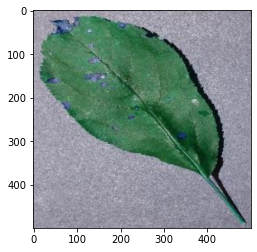

In [74]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()